In [263]:
%%javascript 
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [264]:
%autoreload 2
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

In [265]:
from __future__ import print_function
import pandas as pd
import h5py
import sys
sys.path.append("../")
import extract_catalog as ec
import get_DM_centroids as getDM
import get_gal_centroids as getgal
import seaborn as sns

In [266]:
import compute_distance as compDist
import plot_DM_prop as plotDM
import plot_gal_prop as plotgal

In [267]:
sns.set_style('white')

In [268]:
data_path = "../../data/"

In [190]:
# main datafile
main_h5 = h5py.File(
    data_path + 
    "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135.hdf5", 
    "r")

total_clstNo = 5
date_stamp = '05_23_16'

# load the data

In [218]:
DM_fhats = \
    h5py.File(
        data_path + "test_DM_fhat_clst{0}_{1}.h5".format(
            total_clstNo, date_stamp), 'r')
    

star_fhats = \
    h5py.File(
        data_path + "test_stars_fhat_clst{0}_{1}.h5".format(
            total_clstNo, date_stamp), 'r')

# figure out how the centroids and the shrinking aperture worked

In [192]:
star_fhat_path_lists = compDist.retrieve_cluster_path(star_fhats)
star_fhat = star_fhats[star_fhat_path_lists[0]]

In [210]:
DM_metadata = getDM.retrieve_DM_metadata_from_gal_h5file(star_fhats)

In [211]:
DM_metadata

OrderedDict([('clstNo', [40, 46, 48, 51, 58]), ('cut', array([u'mag'], 
                    dtype='<U32')), ('weights', array([u'i_band'], 
                    dtype='<U32')), ('los_axis', array([u'1'], 
                    dtype='<U32')), ('projection',
              [('0.8410686706', '0.7853981634'),
               ('0.8410686706', '2.3561944902'),
               ('0.8410686706', '3.9269908170'),
               ('0.8410686706', '5.4977871438'),
               ('1.5707963268', '0.0000000000'),
               ('1.5707963268', '1.5707963268')])])

In [212]:
clstNo_list = np.unique([int(p.split('/')[0]) 
                         for p in star_fhat_path_lists]
                       )

In [213]:
R200C = main_h5["Group"]['Group_R_Crit200'][:clstNo_list[-1] + 1]

# we have 2 sets of DM density estimates 

this is due to two different kernel smoothing size

In [214]:
DM_fhat_path = []
DM_fhats.visit(DM_fhat_path.append)

In [215]:
star_fhat_path = []
star_fhat.visit(star_fhat_path.append)

In [220]:
DM_path_list = \
    compDist.retrieve_cluster_path(DM_fhats)

```python
for path in star_fhat_path_lists:
    # the path specifies all the metadata info about projection
    fhat = star_fhats[path]
    clstNo = int(path.split('/')[0])
    
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    plotgal.plot_KDE_peaks(
        fhat, allPeaks=True, R200C=R200C[clstNo],
        showData=True, clstNo=clstNo, ax=ax, fig=fig,
        plotDataPoints=False, save=False
    )
```

# Visualize the smoothed and not smoothed histograms


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


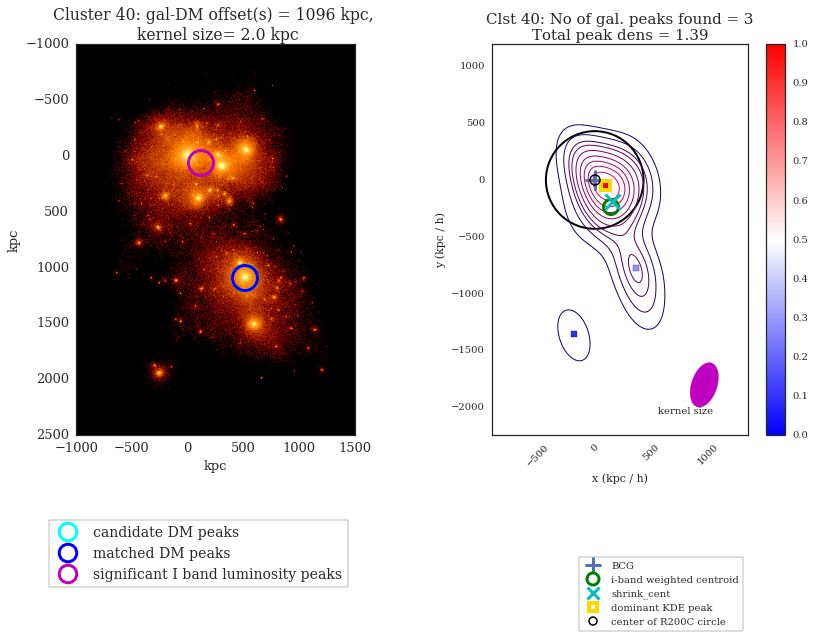


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


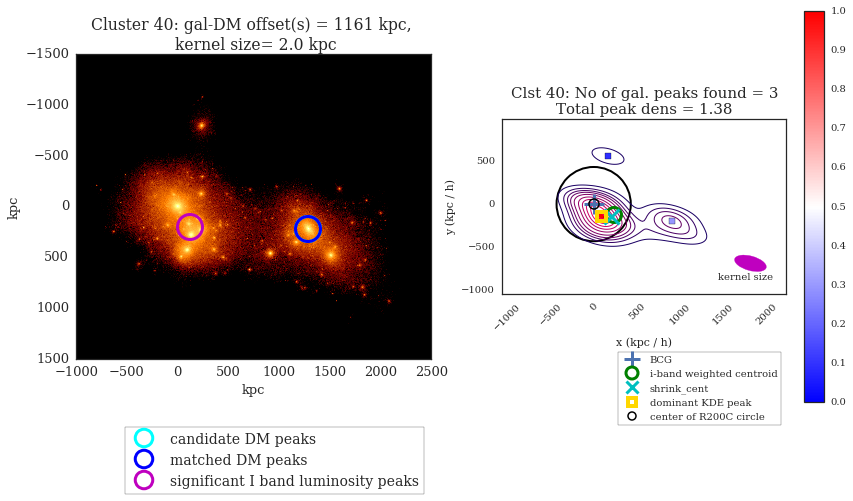


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


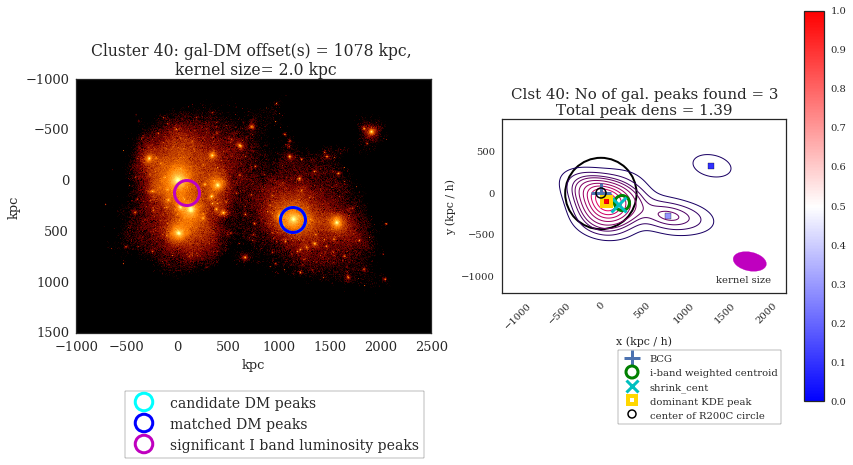


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


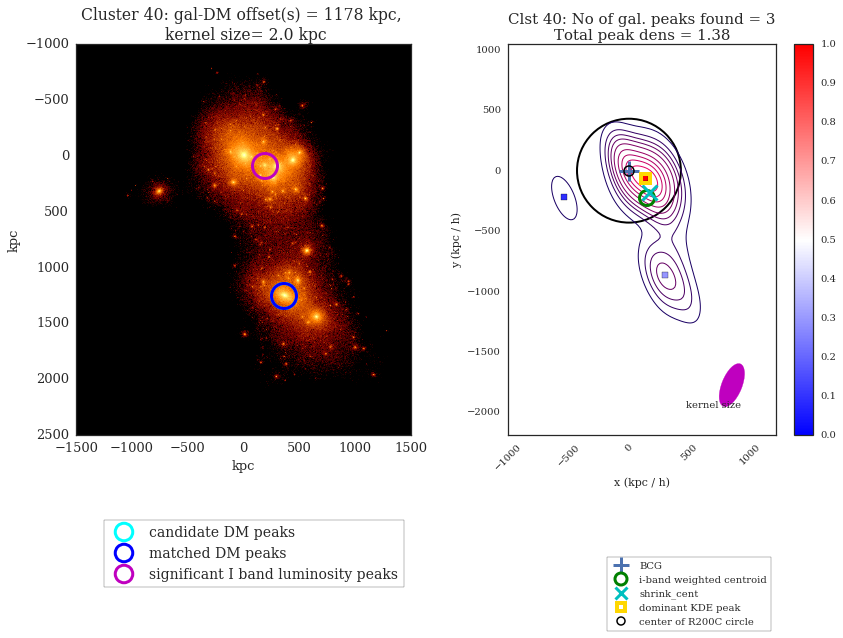


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


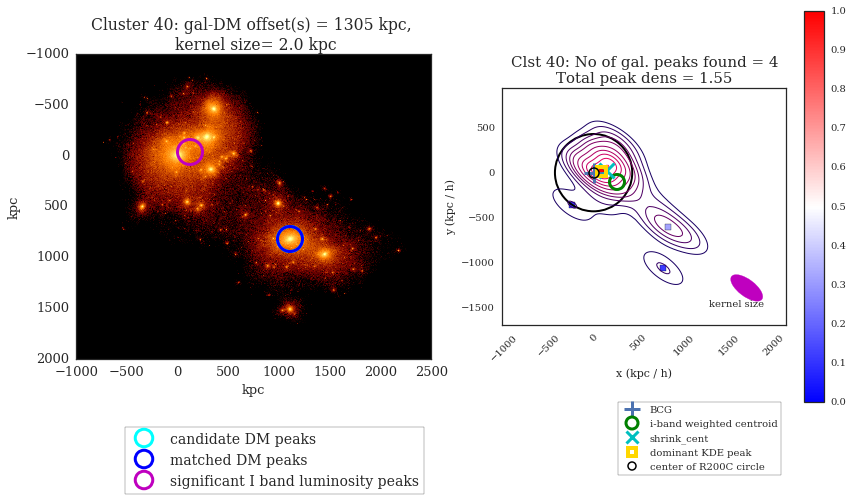

In [261]:
for index in range(len(DM_path_list) / 2)[:5]:
    flip_y = -1.
    fig = plt.figure(figsize=(14, 7))
    ax1 = fig.add_subplot(121, axisbg='black', aspect='equal')
    
    path1 = DM_path_list[2 * index]
    clstNo = path1.split('/')[0]
    DM_clst_dict = DM_fhats[path1]
    
    path3 = '/'.join(path1.split('/')[:-1])
    star_fhat = star_fhats[path3]
    
    plotDM.plot_DM_fhat(
        fhat=DM_clst_dict, fhat_stars=star_fhat, clstNo=clstNo, ax=ax1,
        legend_box_anchor=(1.,-.2)
    )    
    
    ax3 = fig.add_subplot(122, aspect='equal')
    
    ax3.plot(star_fhat['BCG'][0], flip_y * star_fhat['BCG'][1], '+', 
             mew=3, label='BCG', ms=20
            )
    
    ax3.plot(star_fhat['centroid'][0], flip_y * star_fhat['centroid'][1], 
             'go', mew=3, label='i-band weighted centroid', 
             ms=15, fillstyle='none'
            )
    
    ax3.plot(star_fhat['shrink_cent'][0], 
             flip_y * star_fhat['shrink_cent'][1], 'cx', mew=3,
             label='shrink_cent', ms=15, fillstyle='none'
            )
    
    plotgal.plot_KDE_peaks(
        star_fhat, allPeaks=True, R200C=R200C[int(clstNo)],
        showData=True, clstNo=clstNo, ax=ax3, fig=fig,
        plotDataPoints=False, save=False, legend_box_anchor=(1, -.3),
        flip_y=flip_y
    )

    plt.show()
    plt.close()

# smoother DM plots vs galaxy density plot


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


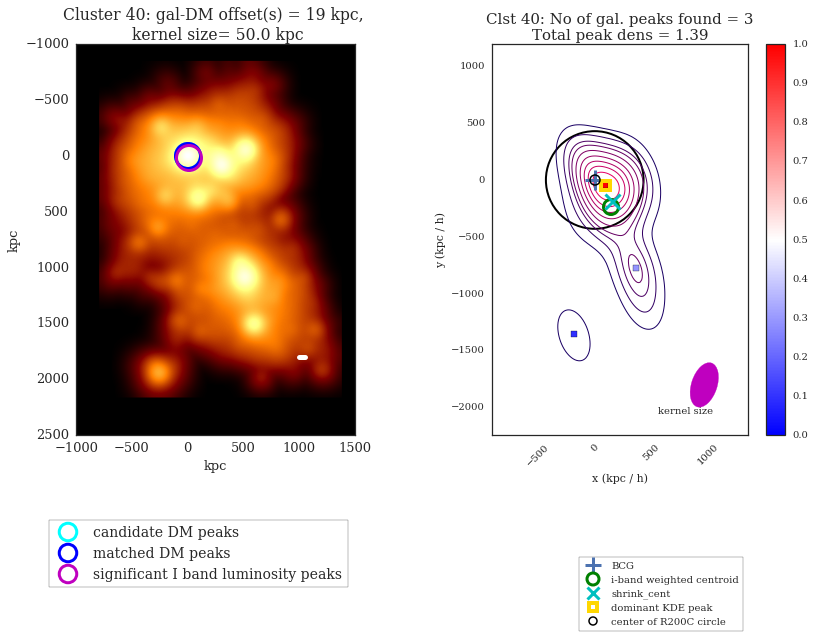


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


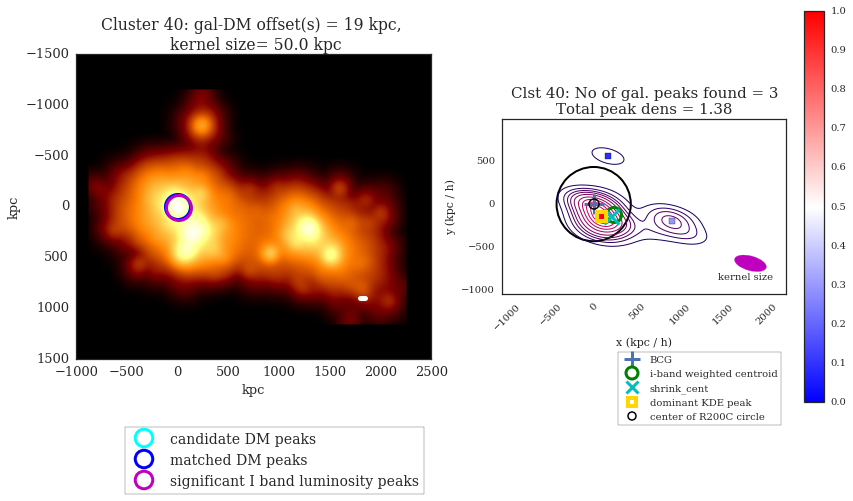


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


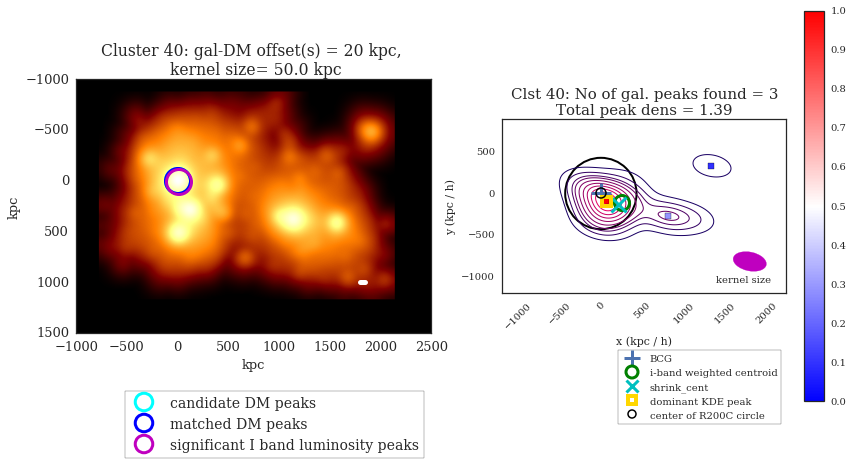

In [262]:
for index in range(len(DM_path_list) / 2)[:3]:
    flip_y = -1.
    fig = plt.figure(figsize=(14, 7))
    
    
    ax1 = fig.add_subplot(121, axisbg='black', aspect='equal')
    path2 = DM_path_list[2 * index + 1]
    clstNo = path2.split('/')[0]
    kernel_width = float(path2.split('/')[-1])
    
    DM_clst_dict = DM_fhats[path2]
    plotDM.plot_DM_fhat(
        fhat=DM_clst_dict, fhat_stars=star_dict, clstNo=clstNo, ax=ax1,
        legend_box_anchor=(1.,-.2), log_scale=False, 
        kernel_width=kernel_width
    )
    
    path3 = '/'.join(path2.split('/')[:-1])
    star_fhat = star_fhats[path3]
    ax3 = fig.add_subplot(122, aspect='equal')
    
    ax3.plot(star_fhat['BCG'][0], flip_y * star_fhat['BCG'][1], '+', mew=3,
             label='BCG', ms=20
            )
    
    ax3.plot(star_fhat['centroid'][0], flip_y * star_fhat['centroid'][1], 
             'go', mew=3, label='i-band weighted centroid', 
             ms=15, fillstyle='none'
            )
    
    ax3.plot(star_fhat['shrink_cent'][0], 
             flip_y * star_fhat['shrink_cent'][1], 'cx', mew=3,
             label='shrink_cent', ms=15, fillstyle='none'
            )
    
    plotgal.plot_KDE_peaks(
        star_fhat, allPeaks=True, R200C=R200C[int(clstNo)],
        showData=True, clstNo=clstNo, ax=ax3, fig=fig,
        plotDataPoints=False, save=False, legend_box_anchor=(1, -.3),
        flip_y=flip_y
    )

    plt.show()
    plt.close()